<a href="https://colab.research.google.com/github/misuk007/Corona-Virus-Detector-Using-Java-Exception/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from google.colab import files

plt.style.use('dark_background')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


import warnings
warnings.filterwarnings('ignore')

In [ ]:
#upload the data file
uploadFile = files.upload()
df = pd.read_csv('diabetes_prediction_dataset.csv')

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset (8).csv


In [ ]:
#See total columns and rows
df.shape

(100000, 9)

In [ ]:
#Identify null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
#Describe the dataset
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
#Get the gender count of the data set
df.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [ ]:
#Get smoking count of the data set
df.smoking_history.value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

Data Cleaning

---

In [ ]:
#Drop rows that contain "No Info" Value
df = df[df.smoking_history.str.contains('No Info') == False]

In [ ]:
#replace smoking history values
df['smoking_history'].replace(['never', 'former', 'not current', 'current', 'ever'], [0, 1, 2, 3, 4], inplace=True)

In [ ]:
#smoking history count
df.smoking_history.value_counts()

0    35095
1     9352
3     9286
2     6447
4     4004
Name: smoking_history, dtype: int64

In [ ]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,0,25.19,6.6,140,0
2,Male,28.0,0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,3,23.45,5.0,155,0
4,Male,76.0,1,1,3,20.14,4.8,155,0
5,Female,20.0,0,0,0,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,Female,26.0,0,0,0,34.34,6.5,160,0
99993,Female,40.0,0,0,0,40.69,3.5,155,0
99997,Male,66.0,0,0,1,27.83,5.7,155,0
99998,Female,24.0,0,0,0,35.42,4.0,100,0


In [ ]:
#check for data set types
print(df.dtypes)

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [ ]:
#data set with "No Info" rows removed
df.shape

(64184, 9)

In [ ]:
#Check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64184 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               64184 non-null  object 
 1   age                  64184 non-null  float64
 2   hypertension         64184 non-null  int64  
 3   heart_disease        64184 non-null  int64  
 4   smoking_history      64184 non-null  int64  
 5   bmi                  64184 non-null  float64
 6   HbA1c_level          64184 non-null  float64
 7   blood_glucose_level  64184 non-null  int64  
 8   diabetes             64184 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 4.9+ MB


In [ ]:
#visualize the genders
gender = df['gender'].value_counts()
gender

Female    38852
Male      25320
Other        12
Name: gender, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

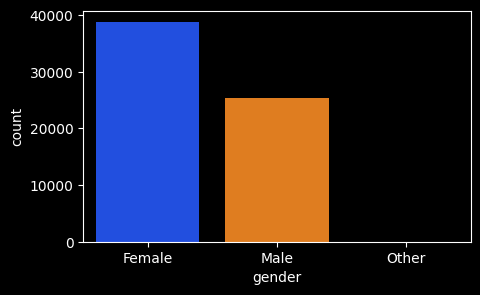

In [ ]:
#Vizualization
fig = plt.figure(figsize=(5,3))
sns.countplot(x='gender', data=df, palette='bright')

In [ ]:
#Remove other value from gender
df = df[df.gender.str.contains('Other') == False]

<Axes: xlabel='gender', ylabel='count'>

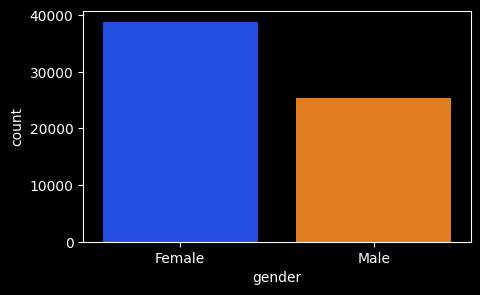

In [ ]:
#Vizualization of males and females
fig = plt.figure(figsize=(5,3))
sns.countplot(x='gender', data=df, palette='bright')

In [ ]:
#Replace male and female to 0 and 1
df['gender'].replace(['Male', 'Female'], [0, 1], inplace=True)

Logistic Regression - Everyone

---



In [ ]:
#machine learning
#Split data into a training and testing set
#Everyone

x = df.iloc[:,:8]
y = df['diabetes']

x

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,1,80.0,0,1,0,25.19,6.6,140
2,0,28.0,0,0,0,27.32,5.7,158
3,1,36.0,0,0,3,23.45,5.0,155
4,0,76.0,1,1,3,20.14,4.8,155
5,1,20.0,0,0,0,27.32,6.6,85
...,...,...,...,...,...,...,...,...
99992,1,26.0,0,0,0,34.34,6.5,160
99993,1,40.0,0,0,0,40.69,3.5,155
99997,0,66.0,0,0,1,27.83,5.7,155
99998,1,24.0,0,0,0,35.42,4.0,100


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [ ]:
x_train.shape

(44920, 8)

In [ ]:
x_test.shape

(19252, 8)

In [ ]:
y_train.shape

(44920,)

In [ ]:
y_test.shape

(19252,)

In [ ]:
#LogisticRegression model
model = LogisticRegression()

In [ ]:
#fit the model
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#run the model to do predictions on the testing data set
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

40746    0
87800    0
93818    0
5389     0
92712    0
        ..
96255    0
68474    0
50644    0
30339    0
54293    0
Name: diabetes, Length: 19252, dtype: int64

In [ ]:
#accuary score
model.score(x_test, y_test)

0.9174631207147309

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     17113
           1       0.67      0.51      0.58      2139

    accuracy                           0.92     19252
   macro avg       0.81      0.74      0.77     19252
weighted avg       0.91      0.92      0.91     19252



In [ ]:
confusion_matrix(y_test, y_pred)

array([[16582,   531],
       [ 1058,  1081]])

Improved Score and prediction

---




In [ ]:
df_2 = pd.read_csv('diabetes_prediction_dataset.csv')

#Drop rows that contain "No Info" Value
df_2 = df_2[df_2.smoking_history.str.contains('No Info') == False]
df_2

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
99992,Female,26.0,0,0,never,34.34,6.5,160,0
99993,Female,40.0,0,0,never,40.69,3.5,155,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
#Feature Engineering
diabetes = pd.get_dummies(df_2, drop_first=True)
diabetes.sample(5)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
92435,19.0,0,0,27.65,5.0,200,0,0,0,0,0,1,0
86199,72.0,0,0,27.32,6.2,159,0,0,0,0,1,0,0
90512,39.0,0,0,23.28,6.0,155,0,1,0,0,0,1,0
96024,14.0,0,0,35.53,5.8,90,0,0,0,0,0,1,0
18406,22.0,0,0,24.90,6.2,130,0,0,0,0,0,0,0


In [ ]:
#Remove gender_Other column
diabetes = diabetes.drop('gender_Other', axis=1)

In [ ]:
diabetes.sample(5)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
1166,78.0,1,0,27.77,6.1,126,0,1,0,0,1,0
71850,80.0,0,0,20.12,4.5,85,0,0,0,0,1,0
45493,48.0,0,0,27.22,6.5,140,0,0,0,0,1,0
99736,40.0,0,0,30.87,4.8,130,0,0,1,0,0,0
8025,17.0,0,0,21.38,6.1,100,0,0,0,0,1,0


In [ ]:
#Split the data
X2_train, X2_test, y2_train, y2_test = train_test_split(diabetes.drop('diabetes', axis=1), diabetes['diabetes'])

In [ ]:
X2_test

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
35321,20.0,0,0,19.69,5.7,200,0,0,0,1,0
62140,61.0,0,0,28.40,3.5,130,1,0,0,0,0
1466,55.0,0,0,30.34,3.5,158,1,0,0,1,0
32565,29.0,0,0,35.43,5.0,158,0,0,0,1,0
16227,39.0,0,0,66.88,6.5,126,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2985,67.0,0,0,28.84,5.7,160,1,0,1,0,0
11050,16.0,0,0,35.73,4.8,85,1,0,0,0,1
52207,17.0,0,0,24.27,6.1,80,1,0,0,1,0
38989,41.0,0,0,46.09,5.8,126,0,0,0,1,0


In [ ]:
#Train the model
model = LogisticRegression()

In [ ]:
model.fit(X2_train, y2_train)

X2_train

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
51388,48.0,0,0,42.90,6.0,159,0,0,0,1,0
40479,52.0,0,0,22.05,3.5,159,0,0,0,1,0
7675,53.0,0,0,32.64,3.5,126,1,0,0,1,0
69826,72.0,1,0,27.34,6.0,200,0,1,0,0,0
96984,63.0,0,0,25.63,8.8,140,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3293,49.0,0,0,34.42,5.7,126,0,0,0,1,0
22979,42.0,0,0,29.39,6.0,85,1,0,0,0,0
33627,59.0,0,0,28.08,4.8,158,0,0,1,0,0
38931,54.0,0,0,23.65,5.7,90,0,0,0,1,0


In [ ]:
#Predict
model.predict(np.array([[48.0,	0,	0,	42.90,	6.0,	159,	0,	0,	0,	1, 0]]))[0]

0

In [ ]:
model.score(X2_train, y2_train)

0.9321949395487972

In [ ]:
y_pred = model.predict(X2_test)

In [ ]:
confusion_matrix(y2_test, y_pred)

array([[13979,   324],
       [  730,  1013]])

In [ ]:
print(classification_report(y2_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14303
           1       0.76      0.58      0.66      1743

    accuracy                           0.93     16046
   macro avg       0.85      0.78      0.81     16046
weighted avg       0.93      0.93      0.93     16046



Decision Tree - Everyone

---



In [ ]:
#DecisionTree
#Split the data into training and testing datasets
xTrain, xTest, yTrain, yTest = train_test_split(diabetes.drop('diabetes', axis=1), diabetes['diabetes'], test_size=0.3, random_state=42)

In [ ]:
#shapes
xTrain.shape

(44928, 11)

In [ ]:
yTrain.shape

(44928,)

In [ ]:
xTest.shape

(19256, 11)

In [ ]:
yTest.shape

(19256,)

In [ ]:
#Build a random descision tree. Use a maximum depth of 3
decTree = DecisionTreeClassifier(max_depth=3)

In [ ]:
#fit the data to the model
decTree.fit(xTrain, yTrain)

DecisionTreeClassifier(max_depth=3)

[Text(0.6666666666666666, 0.875, 'smoking_history <= 6.7\ngini = 0.195\nsamples = 44928\nvalue = [40005, 4923]\nclass = Low_risk'),
 Text(0.5, 0.625, 'bmi <= 210.0\ngini = 0.118\nsamples = 42698\nvalue = [40005, 2693]\nclass = Low_risk'),
 Text(0.3333333333333333, 0.375, 'smoking_history <= 5.35\ngini = 0.077\nsamples = 41675\nvalue = [40005, 1670]\nclass = Low_risk'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 16459\nvalue = [16459, 0]\nclass = Low_risk'),
 Text(0.5, 0.125, 'gini = 0.124\nsamples = 25216\nvalue = [23546, 1670]\nclass = Low_risk'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 1023\nvalue = [0, 1023]\nclass = High_Risk'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 2230\nvalue = [0, 2230]\nclass = High_Risk')]

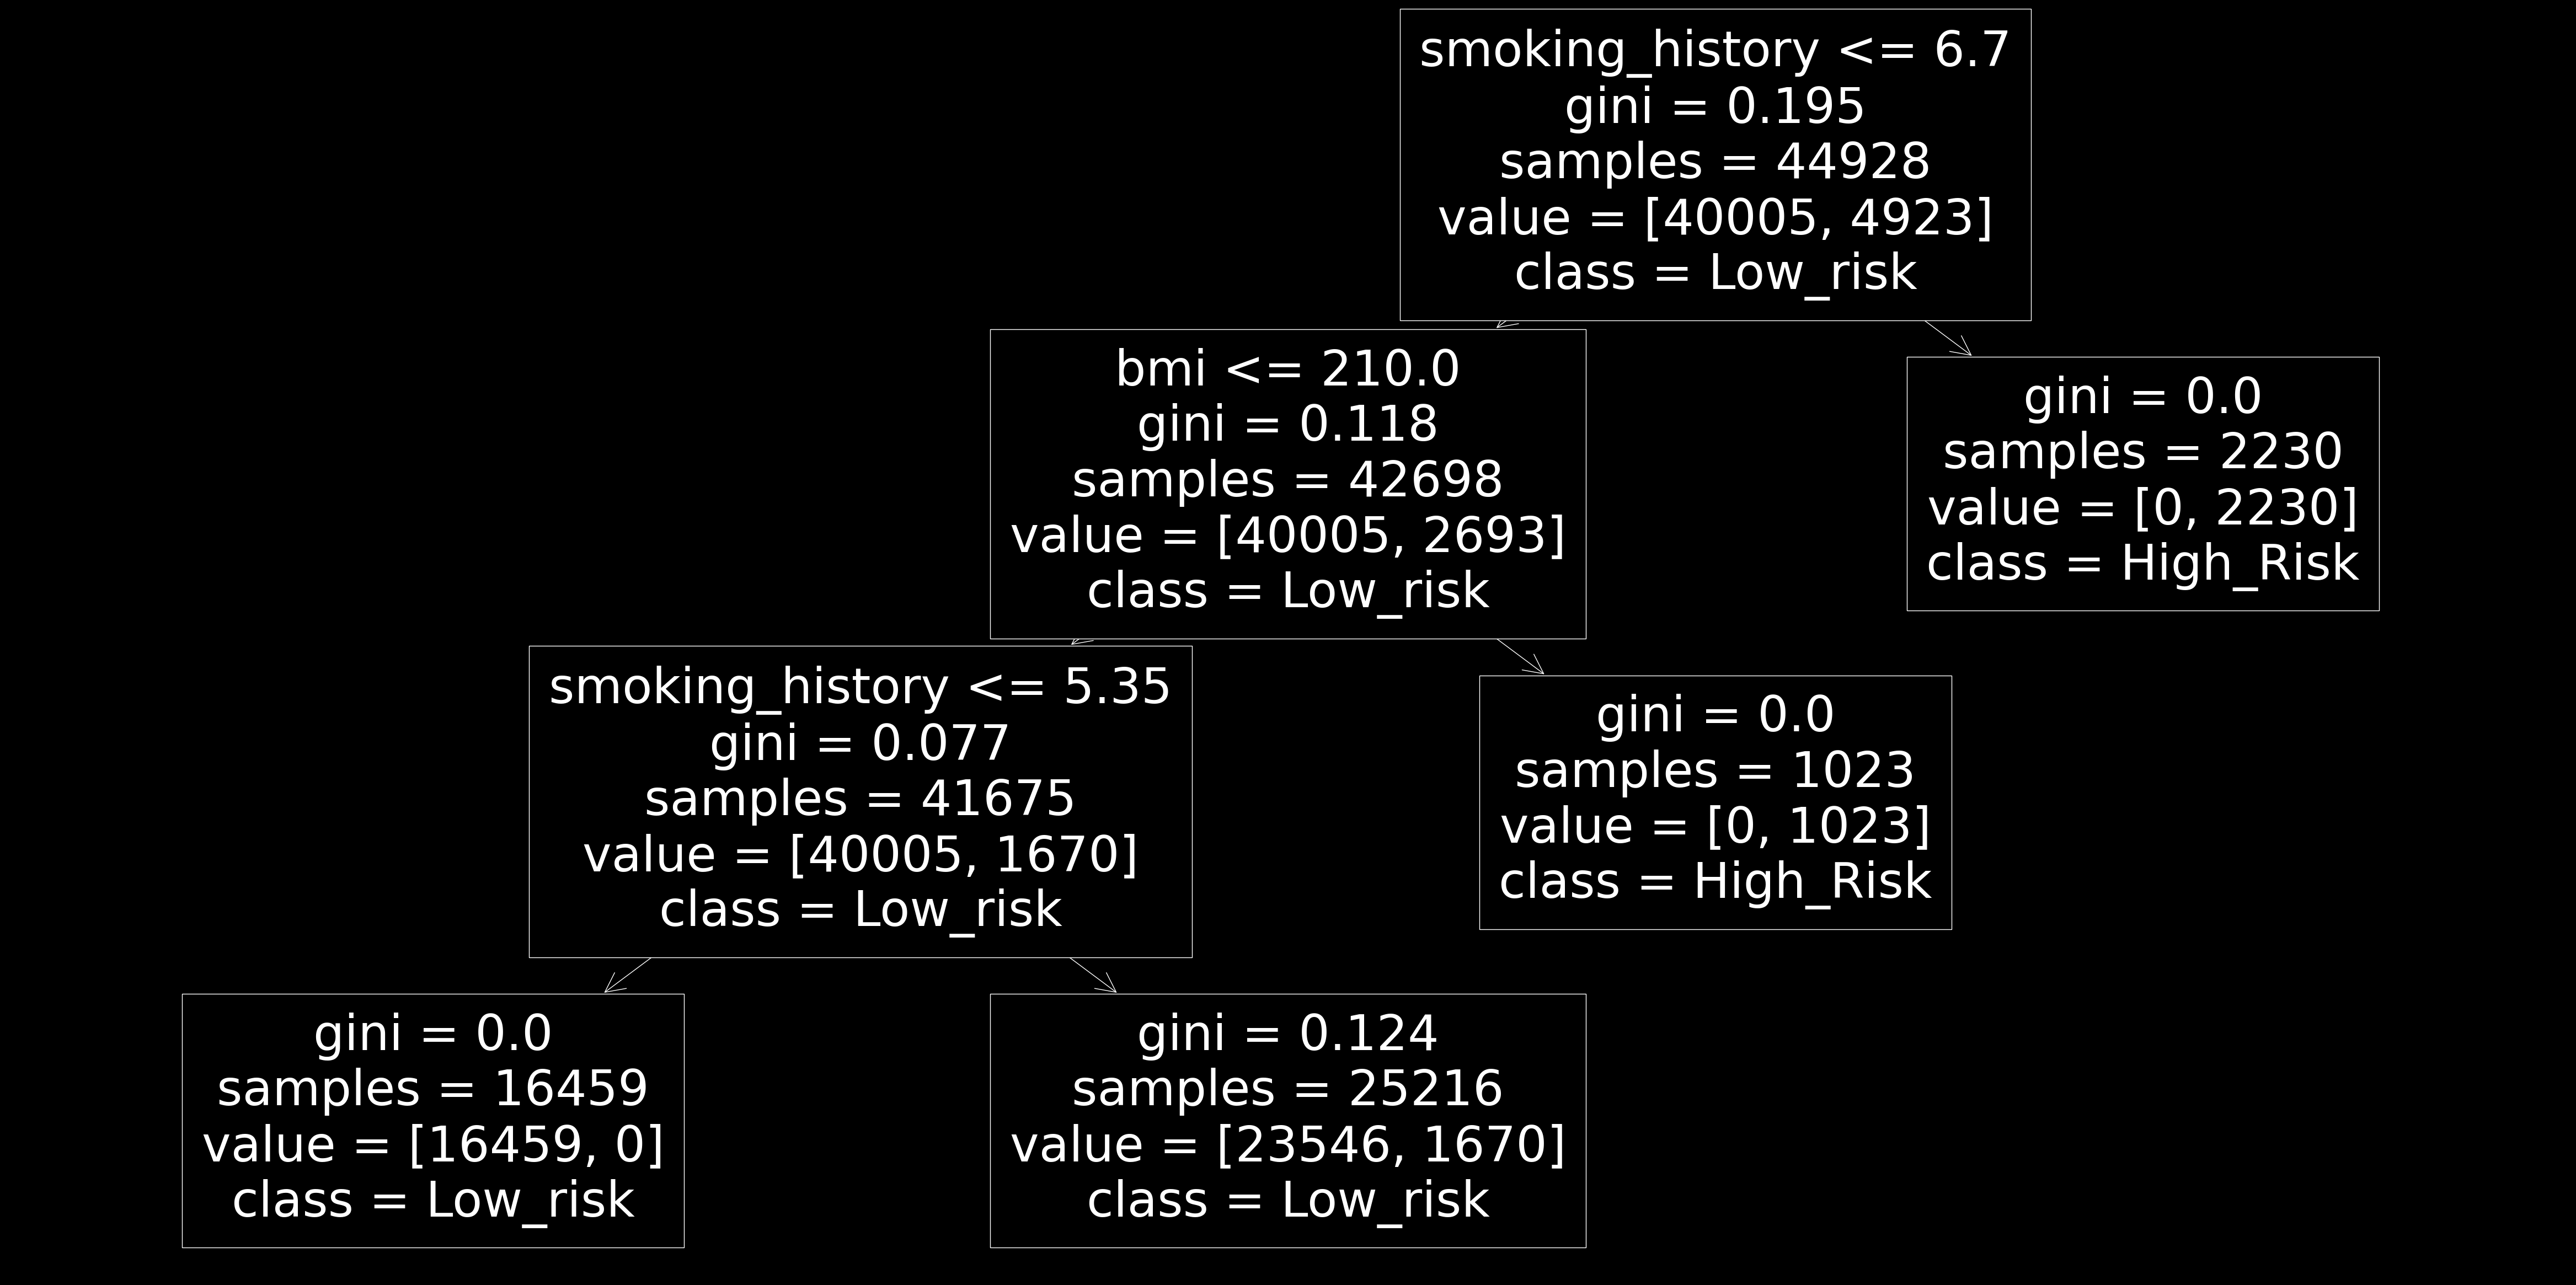

In [ ]:
#Visualize the decision Tree
plt.figure(figsize=(60, 30))
plot_tree(decTree, feature_names=x.columns, class_names=['Low_risk', 'High_Risk'])

In [ ]:
#Do predictions with decision tree for training and testing data
yTrainPred = decTree.predict(xTrain)
yTestPred = decTree.predict(xTest)

In [ ]:
#Evaluate the model
print('Confusion Matrix for Training Data')
print(confusion_matrix(yTrain, yTrainPred))

Confusion Matrix for Training Data
[[40005     0]
 [ 1670  3253]]


In [ ]:
print('Confusion Matrix for Training Data')
print(confusion_matrix(yTest, yTestPred))

Confusion Matrix for Training Data
[[17133     0]
 [  685  1438]]


In [ ]:
#classification report for training data
print(classification_report(yTrain, yTrainPred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     40005
           1       1.00      0.66      0.80      4923

    accuracy                           0.96     44928
   macro avg       0.98      0.83      0.89     44928
weighted avg       0.96      0.96      0.96     44928



In [ ]:
#classifation report for testing data
print(classification_report(yTest, yTestPred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17133
           1       1.00      0.68      0.81      2123

    accuracy                           0.96     19256
   macro avg       0.98      0.84      0.89     19256
weighted avg       0.97      0.96      0.96     19256



Heatmap - Everyone

---



<Axes: >

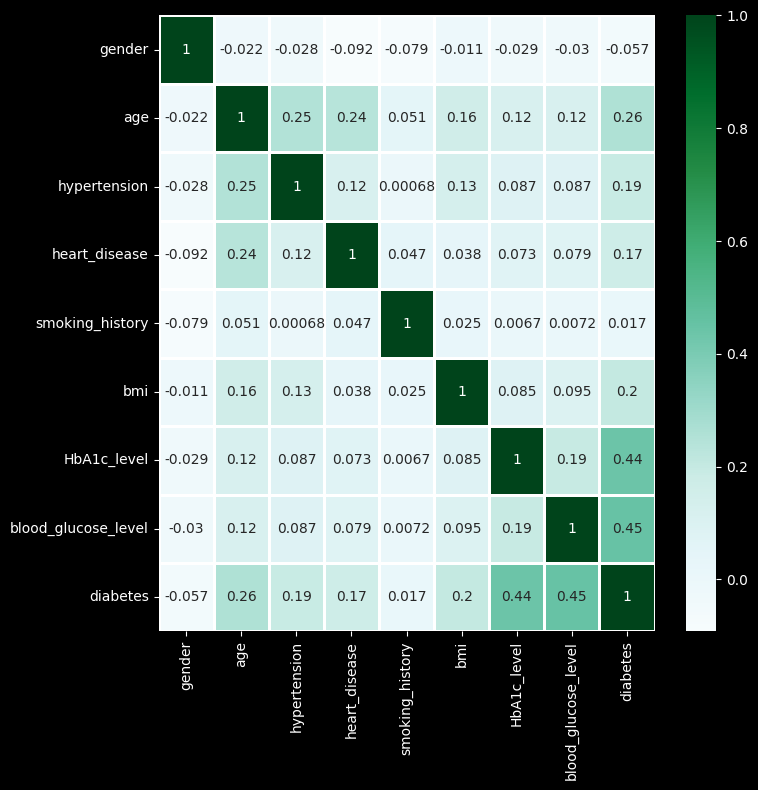

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap="BuGn", linewidths=1)

Data Cleaning

---



In [ ]:
#Separate dataset between genders
MD = diabetes[diabetes['gender_Male']== 1].reset_index()
FD = diabetes[diabetes['gender_Male']== 0].reset_index()

In [ ]:
#Males
MD

,index,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,2,28.0,0,0,27.32,5.7,158,0,1,0,0,1,0
1,4,76.0,1,1,20.14,4.8,155,0,1,0,0,0,0
2,8,42.0,0,0,33.64,4.8,145,0,1,0,0,1,0
3,16,15.0,0,0,30.36,6.1,200,0,1,0,0,1,0
4,19,37.0,0,0,25.72,3.5,159,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25315,99970,32.0,0,0,37.71,6.1,126,0,1,1,0,0,0
25316,99976,13.0,0,0,21.01,4.8,140,0,1,0,0,1,0
25317,99978,14.0,0,0,23.67,5.8,145,0,1,0,0,1,0
25318,99991,22.0,0,0,29.65,6.0,80,0,1,0,0,0,0


In [ ]:
#Sort smoking for males
MD[['smoking_history_ever',	'smoking_history_former',	'smoking_history_never',	'smoking_history_not current']].apply(pd.Series.value_counts)

,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,23555,20742,13097,22794
1,1765,4578,12223,2526


In [ ]:
#Females
FD

,index,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,0,0,0,1,0
1,3,36.0,0,0,23.45,5.0,155,0,0,0,0,0,0
2,5,20.0,0,0,27.32,6.6,85,0,0,0,0,1,0
3,6,44.0,0,0,19.31,6.5,200,1,0,0,0,1,0
4,9,32.0,0,0,27.32,5.0,100,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38859,99987,23.0,0,0,17.87,5.8,100,0,0,0,0,1,0
38860,99992,26.0,0,0,34.34,6.5,160,0,0,0,0,1,0
38861,99993,40.0,0,0,40.69,3.5,155,0,0,0,0,1,0
38862,99998,24.0,0,0,35.42,4.0,100,0,0,0,0,1,0


In [ ]:
#Sort smoking for females
FD[['smoking_history_ever',	'smoking_history_former',	'smoking_history_never',	'smoking_history_not current']].apply(pd.Series.value_counts)

,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,36625,34090,15992,34943
1,2239,4774,22872,3921


Logistic Regression - Males

---



In [ ]:
#machine learning
#Split data into a training and testing set
#males
x = MD.drop('diabetes', axis=1)
y = MD['diabetes']

x

,index,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,2,28.0,0,0,27.32,5.7,158,1,0,0,1,0
1,4,76.0,1,1,20.14,4.8,155,1,0,0,0,0
2,8,42.0,0,0,33.64,4.8,145,1,0,0,1,0
3,16,15.0,0,0,30.36,6.1,200,1,0,0,1,0
4,19,37.0,0,0,25.72,3.5,159,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25315,99970,32.0,0,0,37.71,6.1,126,1,1,0,0,0
25316,99976,13.0,0,0,21.01,4.8,140,1,0,0,1,0
25317,99978,14.0,0,0,23.67,5.8,145,1,0,0,1,0
25318,99991,22.0,0,0,29.65,6.0,80,1,0,0,0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [ ]:
x_train.shape

(17724, 12)

In [ ]:
x_test.shape

(7596, 12)

In [ ]:
y_train.shape

(17724,)

In [ ]:
y_test.shape

(7596,)

In [ ]:
#LogisticRegression model
model = LogisticRegression()

In [ ]:
#fit the model
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#run the model to do predictions on the testing data set
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
y_test

6663     0
15908    0
486      0
17874    0
9750     0
        ..
5249     0
11564    0
2089     0
347      0
1936     0
Name: diabetes, Length: 7596, dtype: int64

In [ ]:
#accuary score
model.score(x_test, y_test)

0.888493944181148

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6600
           1       0.64      0.35      0.45       996

    accuracy                           0.89      7596
   macro avg       0.77      0.66      0.69      7596
weighted avg       0.87      0.89      0.87      7596



In [ ]:
confusion_matrix(y_test, y_pred)

array([[6403,  197],
       [ 650,  346]])

Decision Tree - Males

---



In [ ]:
#DecisionTree
#Split the data into training and testing datasets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
#shapes
xTrain.shape

(17724, 12)

In [ ]:
yTrain.shape

(17724,)

In [ ]:
xTest.shape

(7596, 12)

In [ ]:
yTest.shape

(7596,)

In [ ]:
#Build a random descision tree. Use a maximum depth of 3
decTree = DecisionTreeClassifier(max_depth=3)

In [ ]:
#fit the data to the model
decTree.fit(xTrain, yTrain)

DecisionTreeClassifier(max_depth=3)

[Text(0.6666666666666666, 0.875, 'HbA1c_level <= 6.7\ngini = 0.223\nsamples = 17724\nvalue = [15454, 2270]\nclass = Low_risk'),
 Text(0.5, 0.625, 'blood_glucose_level <= 210.0\ngini = 0.136\nsamples = 16677\nvalue = [15454, 1223]\nclass = Low_risk'),
 Text(0.3333333333333333, 0.375, 'HbA1c_level <= 5.35\ngini = 0.087\nsamples = 16195\nvalue = [15454, 741]\nclass = Low_risk'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 6371\nvalue = [6371, 0]\nclass = Low_risk'),
 Text(0.5, 0.125, 'gini = 0.139\nsamples = 9824\nvalue = [9083, 741]\nclass = Low_risk'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 482\nvalue = [0, 482]\nclass = High_Risk'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 1047\nvalue = [0, 1047]\nclass = High_Risk')]

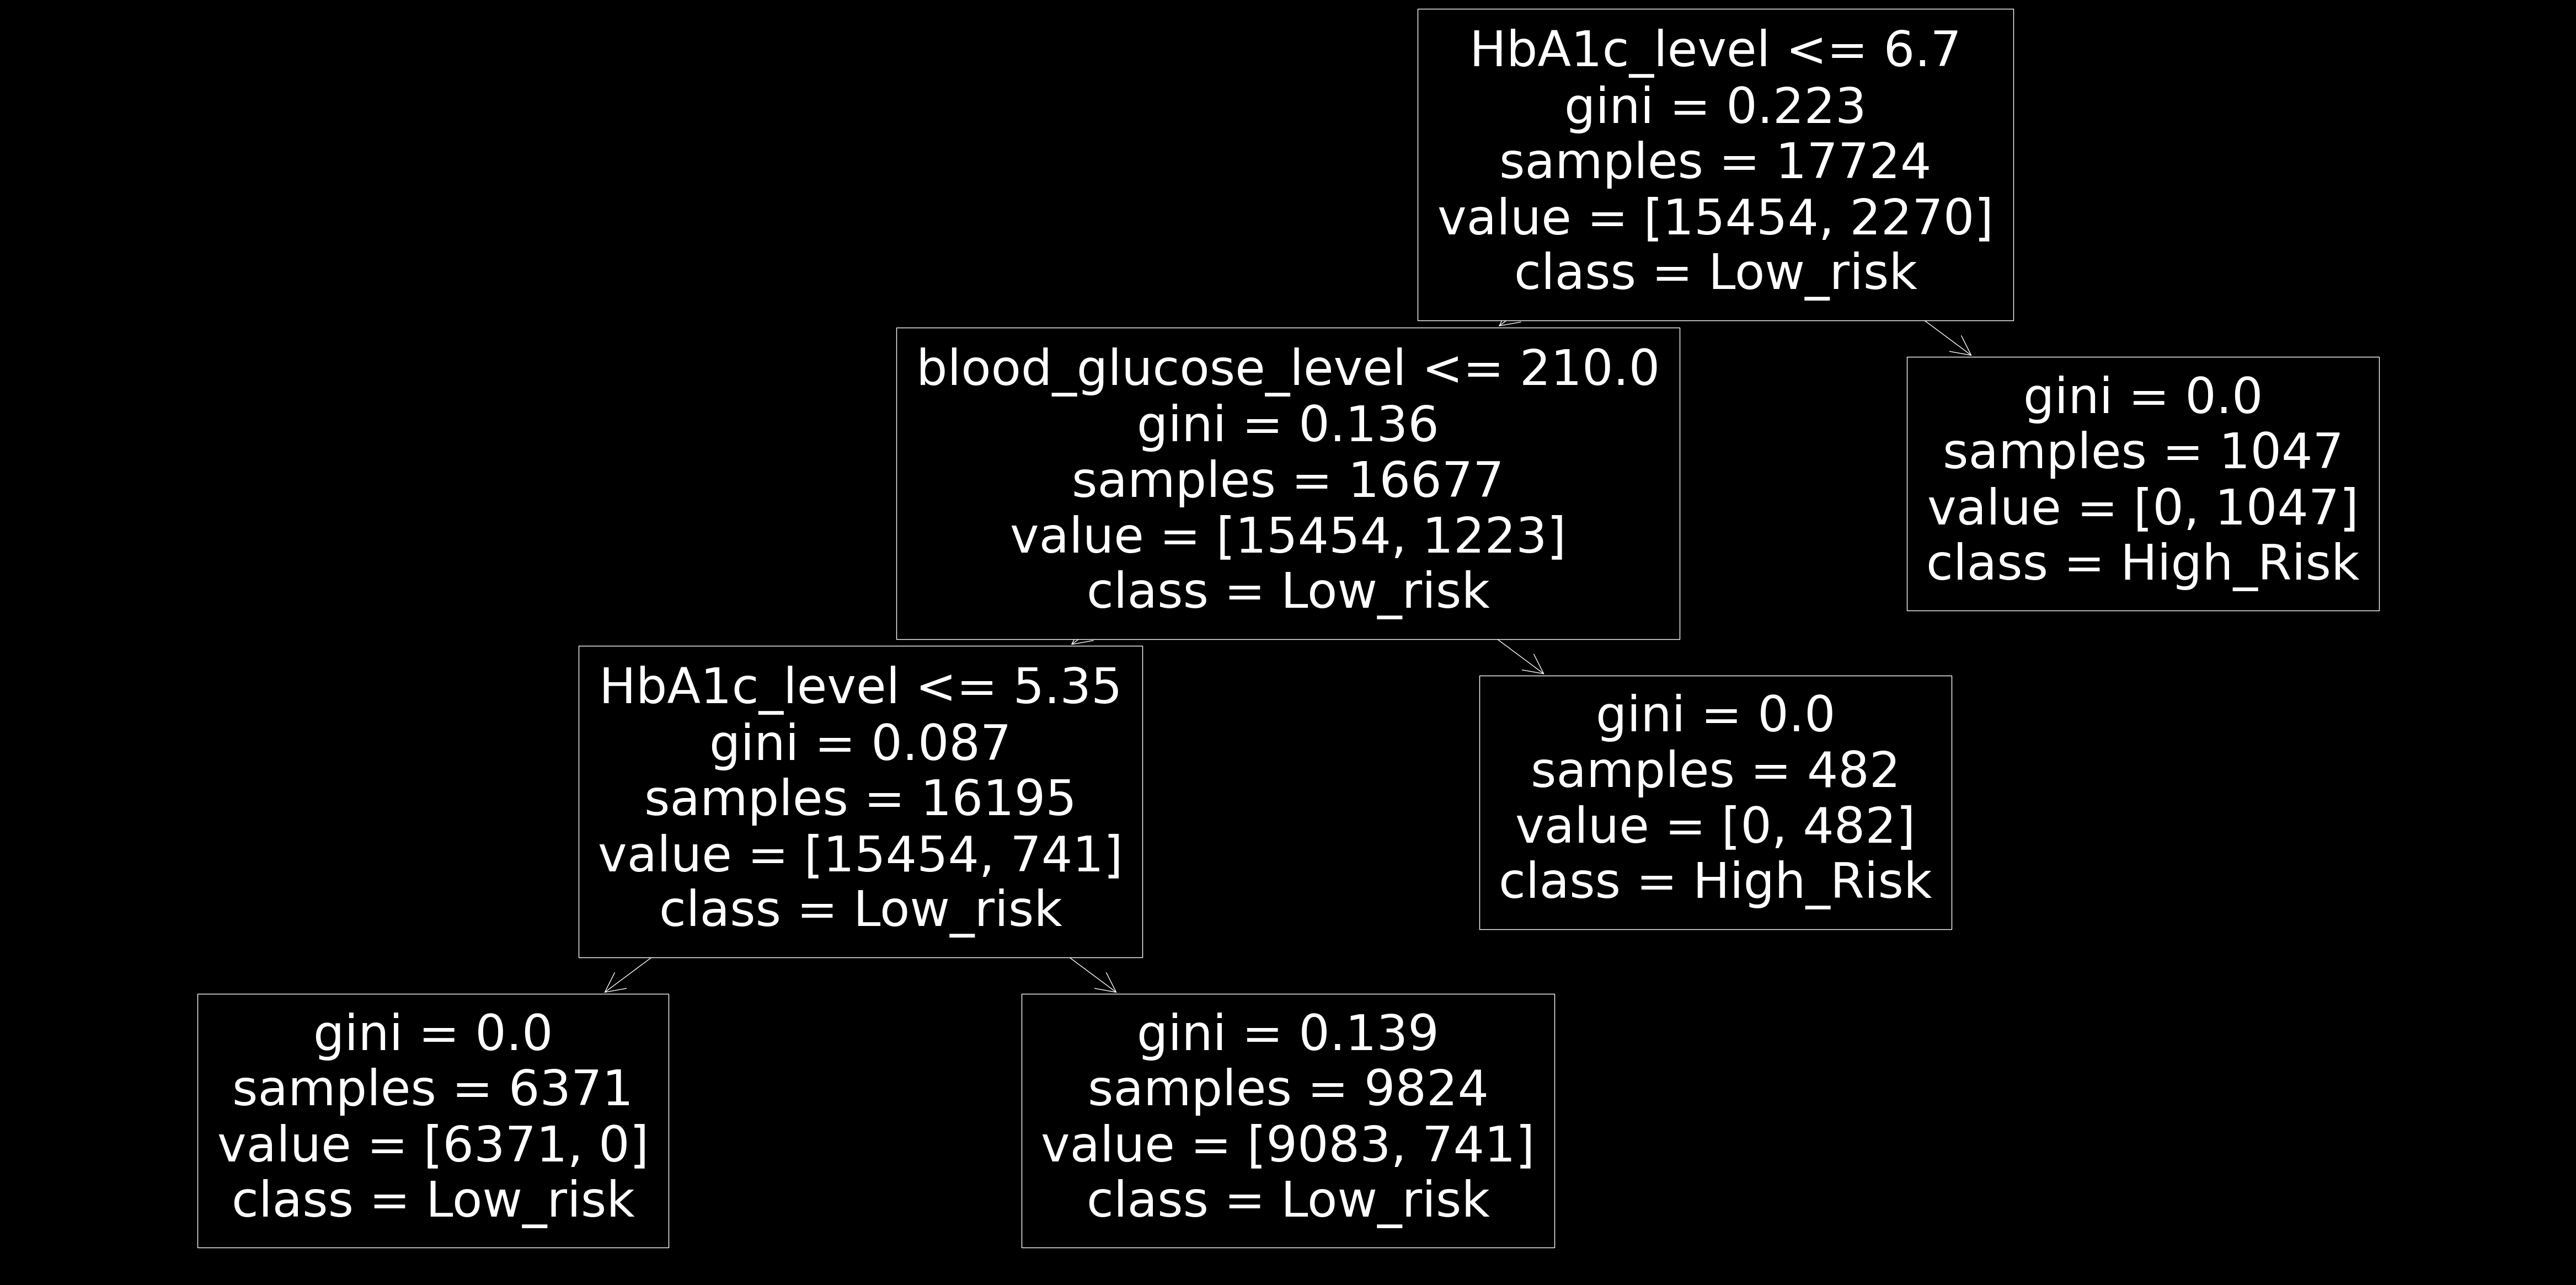

In [ ]:
#Visualize the decision Tree
plt.figure(figsize=(60, 30))
plot_tree(decTree, feature_names=x.columns, class_names=['Low_risk', 'High_Risk'])

In [ ]:
#Do predictions with decision tree for training and testing data
yTrainPred = decTree.predict(xTrain)
yTestPred = decTree.predict(xTest)

In [ ]:
#Evaluate the model
print('Confusion Matrix for Training Data')
print(confusion_matrix(yTrain, yTrainPred))

Confusion Matrix for Training Data
[[15454     0]
 [  741  1529]]


In [ ]:
print('Confusion Matrix for Training Data')
print(confusion_matrix(yTest, yTestPred))

Confusion Matrix for Training Data
[[6527    0]
 [ 388  681]]


In [ ]:
#classification report for training data
print(classification_report(yTrain, yTrainPred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98     15454
           1       1.00      0.67      0.80      2270

    accuracy                           0.96     17724
   macro avg       0.98      0.84      0.89     17724
weighted avg       0.96      0.96      0.95     17724



In [ ]:
#classifation report for testing data
print(classification_report(yTest, yTestPred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6527
           1       1.00      0.64      0.78      1069

    accuracy                           0.95      7596
   macro avg       0.97      0.82      0.87      7596
weighted avg       0.95      0.95      0.94      7596



Heatmap - Males

---



<Axes: >

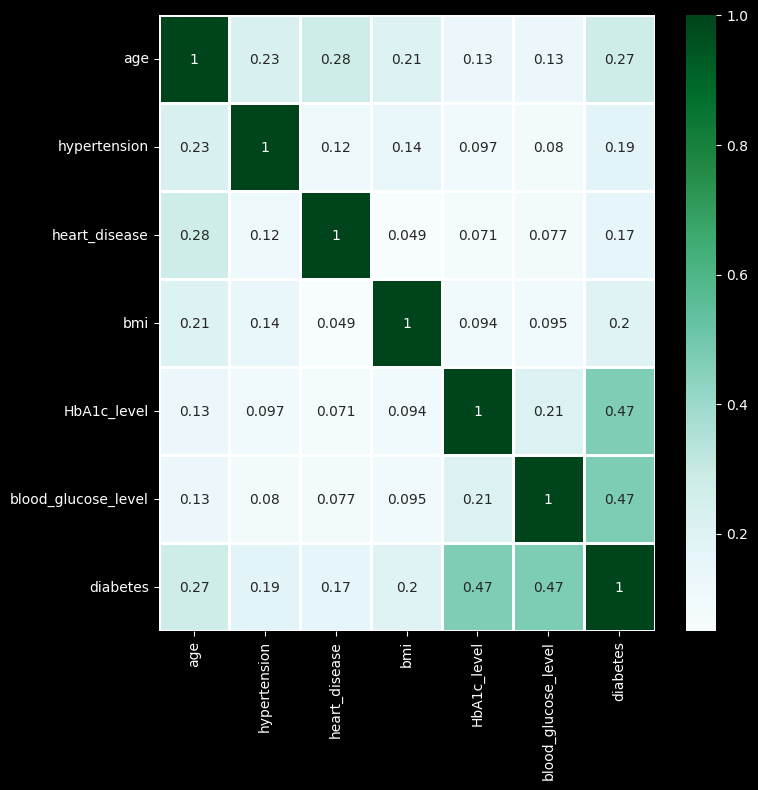

In [ ]:
fig = plt.figure(figsize=(8,8))

MD_HeatMap = MD.drop(['index', 'gender_Male', 'smoking_history_ever',	'smoking_history_former',	'smoking_history_never',	'smoking_history_not current'],axis=1)

sns.heatmap(MD_HeatMap.corr(), annot=True, cmap="BuGn", linewidths=1)

Logistic Regression - Females

---



In [ ]:
#machine learning
#Split data into a training and testing set
#Females

x = FD.drop('diabetes', axis=1)
y = FD['diabetes']

x

,index,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Male,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,0,0,1,0
1,3,36.0,0,0,23.45,5.0,155,0,0,0,0,0
2,5,20.0,0,0,27.32,6.6,85,0,0,0,1,0
3,6,44.0,0,0,19.31,6.5,200,0,0,0,1,0
4,9,32.0,0,0,27.32,5.0,100,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
38859,99987,23.0,0,0,17.87,5.8,100,0,0,0,1,0
38860,99992,26.0,0,0,34.34,6.5,160,0,0,0,1,0
38861,99993,40.0,0,0,40.69,3.5,155,0,0,0,1,0
38862,99998,24.0,0,0,35.42,4.0,100,0,0,0,1,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [ ]:
x_train.shape

(31091, 12)

In [ ]:
x_test.shape

(7773, 12)

In [ ]:
y_train.shape

(31091,)

In [ ]:
y_test.shape

(7773,)

In [ ]:
#LogisticRegression model
model = LogisticRegression()

In [ ]:
#fit the model
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#run the model to do predictions on the testing data set
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

32831    0
10710    0
3574     0
27398    0
28673    0
        ..
21988    0
8963     0
27448    0
30645    0
1223     0
Name: diabetes, Length: 7773, dtype: int64

In [ ]:
#accuary score
model.score(x_test, y_test)

0.9064711179724688

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      7027
           1       0.88      0.03      0.06       746

    accuracy                           0.91      7773
   macro avg       0.89      0.51      0.50      7773
weighted avg       0.90      0.91      0.87      7773



In [ ]:
confusion_matrix(y_test, y_pred)

array([[7024,    3],
       [ 724,   22]])

Decision Tree - Female

---



In [ ]:
#DecisionTree
#Split the data into training and testing datasets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
#shapes
xTrain.shape

(27204, 12)

In [ ]:
yTrain.shape

(27204,)

In [ ]:
xTest.shape

(11660, 12)

In [ ]:
yTest.shape

(11660,)

In [ ]:
#Build a random descision tree. Use a maximum depth of 3
decTree = DecisionTreeClassifier(max_depth=3)

In [ ]:
#fit the data to the model
decTree.fit(xTrain, yTrain)

DecisionTreeClassifier(max_depth=3)

[Text(0.6666666666666666, 0.875, 'HbA1c_level <= 6.7\ngini = 0.174\nsamples = 27204\nvalue = [24583, 2621]\nclass = Low_risk'),
 Text(0.5, 0.625, 'blood_glucose_level <= 210.0\ngini = 0.104\nsamples = 26021\nvalue = [24583, 1438]\nclass = Low_risk'),
 Text(0.3333333333333333, 0.375, 'HbA1c_level <= 5.35\ngini = 0.066\nsamples = 25449\nvalue = [24583, 866]\nclass = Low_risk'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 10291\nvalue = [10291, 0]\nclass = Low_risk'),
 Text(0.5, 0.125, 'gini = 0.108\nsamples = 15158\nvalue = [14292, 866]\nclass = Low_risk'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 572\nvalue = [0, 572]\nclass = High_Risk'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 1183\nvalue = [0, 1183]\nclass = High_Risk')]

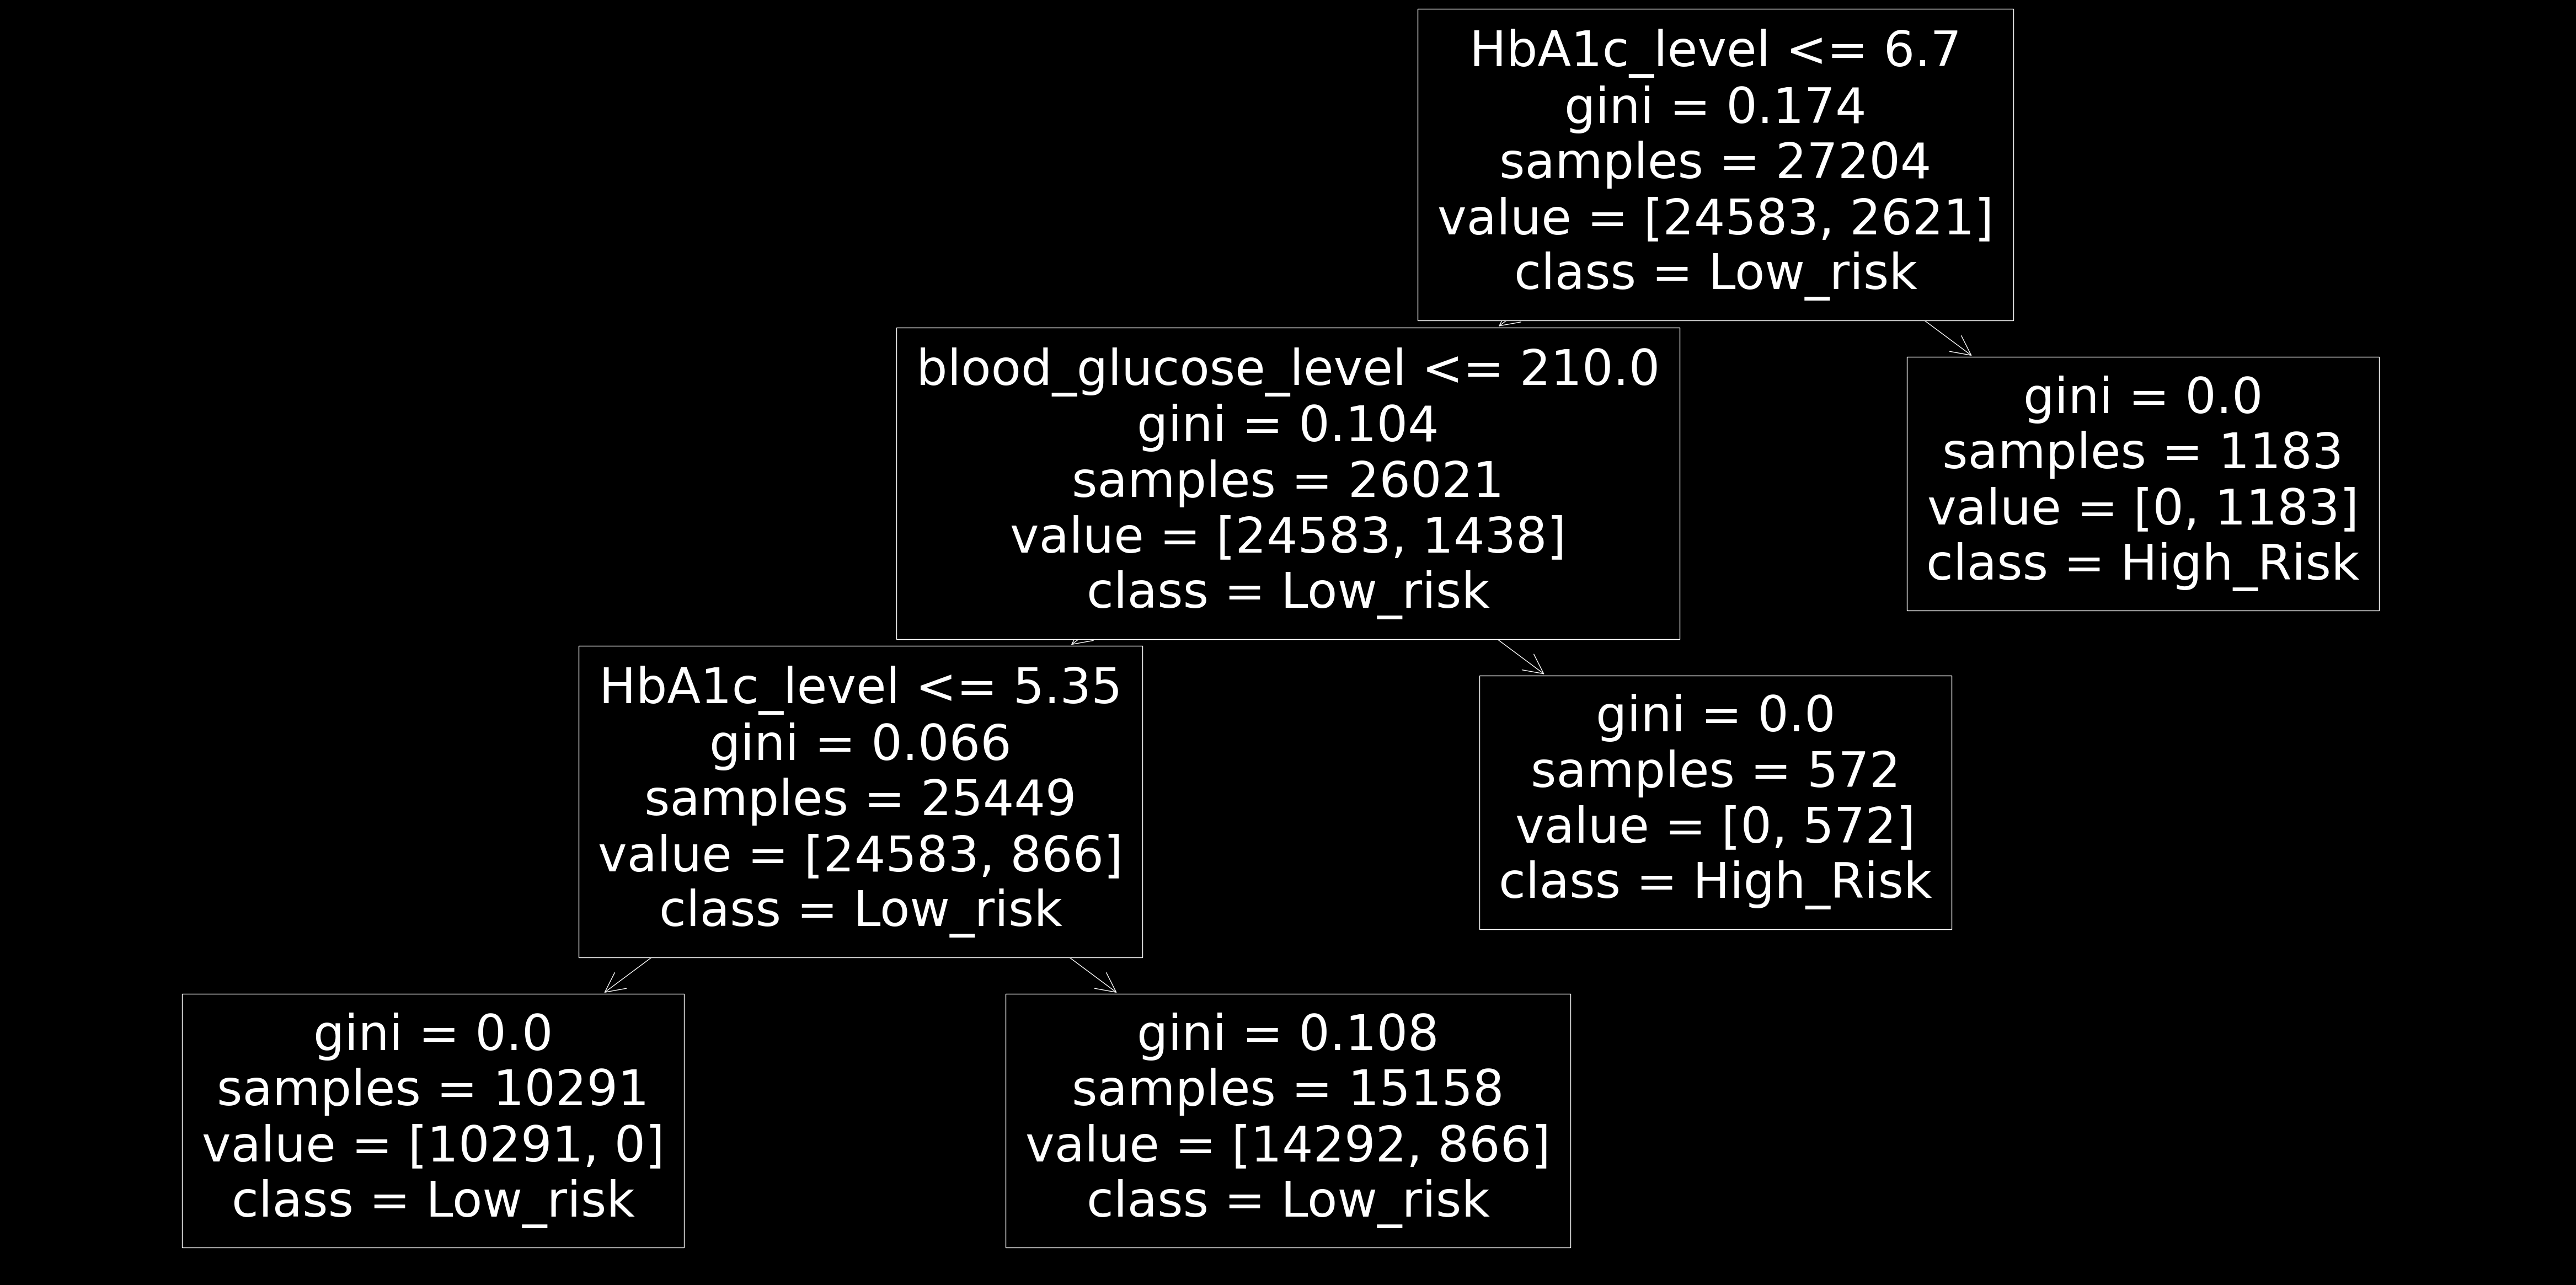

In [ ]:
#Visualize the decision Tree
plt.figure(figsize=(60, 30))
plot_tree(decTree, feature_names=x.columns, class_names=['Low_risk', 'High_Risk'])

In [ ]:
#Do predictions with decision tree for training and testing data
yTrainPred = decTree.predict(xTrain)
yTestPred = decTree.predict(xTest)

In [ ]:
#Evaluate the model
print('Confusion Matrix for Training Data')
print(confusion_matrix(yTrain, yTrainPred))

Confusion Matrix for Training Data
[[24583     0]
 [  866  1755]]


In [ ]:
print('Confusion Matrix for Training Data')
print(confusion_matrix(yTest, yTestPred))

Confusion Matrix for Training Data
[[10574     0]
 [  360   726]]


In [ ]:
#classification report for training data
print(classification_report(yTrain, yTrainPred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     24583
           1       1.00      0.67      0.80      2621

    accuracy                           0.97     27204
   macro avg       0.98      0.83      0.89     27204
weighted avg       0.97      0.97      0.97     27204



In [ ]:
#classifation report for testing data
print(classification_report(yTest, yTestPred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     10574
           1       1.00      0.67      0.80      1086

    accuracy                           0.97     11660
   macro avg       0.98      0.83      0.89     11660
weighted avg       0.97      0.97      0.97     11660



HeatMap - Females

---



<Axes: >

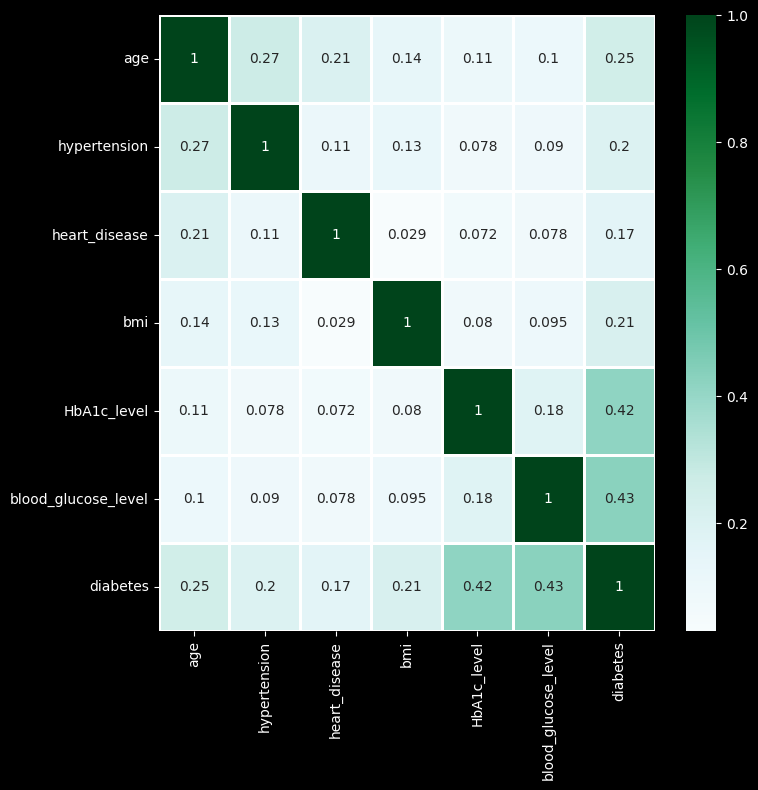

In [ ]:
fig = plt.figure(figsize=(8,8))

FD_HeatMap = FD.drop(['index', 'gender_Male', 'smoking_history_ever',	'smoking_history_former',	'smoking_history_never',	'smoking_history_not current'],axis=1)

sns.heatmap(FD_HeatMap.corr(), annot=True, cmap="BuGn", linewidths=1)